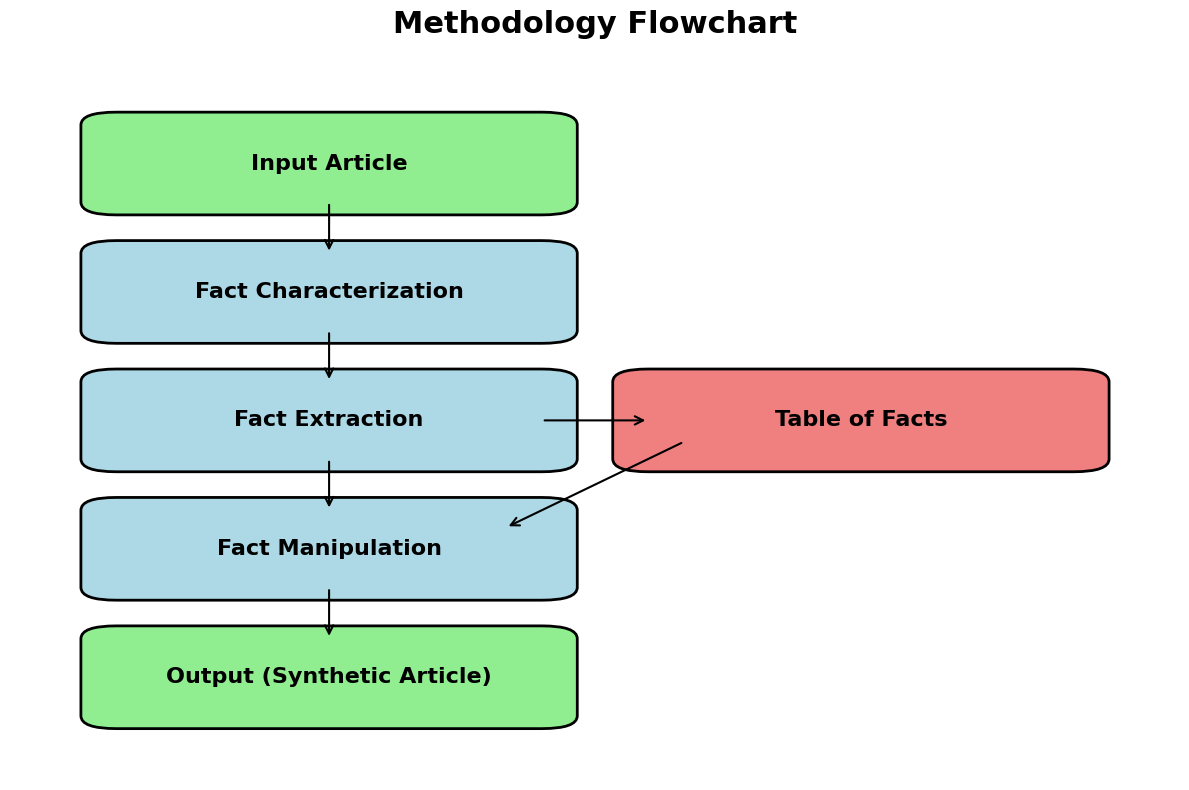

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch

# Initialize the plot with desired figure size
fig, ax = plt.subplots(figsize=(12, 8))  # Width=12 inches, Height=8 inches

# Define node attributes with adjusted positions
nodes = {
    "Input Article": (0, 5),
    "Fact Characterization": (0, 4),
    "Fact Extraction": (0, 3),
    "Table of Facts": (1.5, 3),
    "Fact Manipulation": (0, 2),
    "Output (Synthetic Article)": (0, 1)
}

# Define node size (reduced width for slimmer nodes)
node_width = 1.2  # Reduced from 2 to 1.2
node_height = 0.6  # Slightly increased for better proportion

# Define colors for different node types (optional)
node_colors = {
    "Input Article": 'lightgreen',
    "Fact Characterization": 'lightblue',
    "Fact Extraction": 'lightblue',
    "Table of Facts": 'lightcoral',
    "Fact Manipulation": 'lightblue',
    "Output (Synthetic Article)": 'lightgreen'
}

# Calculate dynamic x-axis limits based on node positions
x_positions = [pos[0] for pos in nodes.values()]
min_x = min(x_positions)
max_x = max(x_positions)

# Define padding based on node width
padding = 0.3
x_min_limit = min_x - (node_width / 2) - padding
x_max_limit = max_x + (node_width / 2) + padding

# Similarly, calculate y-axis limits
y_positions = [pos[1] for pos in nodes.values()]
min_y = min(y_positions)
max_y = max(y_positions)
y_padding = 0.5
y_min_limit = min_y - (node_height / 2) - y_padding
y_max_limit = max_y + (node_height / 2) + y_padding

# Set dynamic axes limits to crop left and right margins
ax.set_xlim(x_min_limit, x_max_limit)
ax.set_ylim(y_min_limit, y_max_limit)

# Optionally, maintain aspect ratio
# ax.set_aspect('equal')  # Uncomment if you want a 1:1 aspect ratio

ax.axis('off')  # Hide the axes

# Draw nodes
for label, (x, y) in nodes.items():
    # Use FancyBboxPatch for rounded rectangles (optional)
    rect = FancyBboxPatch(
        (x - node_width / 2, y - node_height / 2),
        node_width,
        node_height,
        boxstyle="round,pad=0.1",
        facecolor=node_colors.get(label, 'lightblue'),
        edgecolor='black',
        linewidth=2,
        zorder=1  # Nodes are below arrows
    )
    ax.add_patch(rect)
    # Add text label with increased font size
    ax.text(
        x, y, label, 
        ha='center', va='center',
        fontsize=16,  # Increased from 12 to 16
        fontweight='bold',
        wrap=True, 
        zorder=2  # Text above nodes
    )

# Define edges as tuples of (start_node, end_node)
edges = [
    ("Input Article", "Fact Characterization"),
    ("Fact Characterization", "Fact Extraction"),
    ("Fact Extraction", "Fact Manipulation"),
    ("Fact Manipulation", "Output (Synthetic Article)"),
    ("Table of Facts", "Fact Manipulation"),
    ("Fact Extraction", "Table of Facts")  # Reversed arrow
]

# Function to get node center positions
def get_pos(node):
    return nodes[node]

# Draw arrows
for start, end in edges:
    start_x, start_y = get_pos(start)
    end_x, end_y = get_pos(end)
    
    # Calculate direction vector
    dx = end_x - start_x
    dy = end_y - start_y
    distance = (dx**2 + dy**2)**0.5
    if distance == 0:
        distance = 0.1  # Prevent division by zero
    
    # Normalized direction
    dx_norm = dx / distance
    dy_norm = dy / distance
    
    # Adjust start and end points to be at the edge of the rectangles
    start_adj_x = start_x + dx_norm * (node_width / 2)
    start_adj_y = start_y + dy_norm * (node_height / 2)
    end_adj_x = end_x - dx_norm * (node_width / 2)
    end_adj_y = end_y - dy_norm * (node_height / 2)
    
    # Create and add the arrow
    arrow = FancyArrowPatch(
        (start_adj_x, start_adj_y),
        (end_adj_x, end_adj_y),
        arrowstyle='->',
        mutation_scale=15,  # Size of the arrowhead
        linewidth=1.5,      # Thickness of the arrow
        color='black',
        zorder=3  # Arrows are above nodes and text
    )
    ax.add_patch(arrow)

# Add title with increased font size
plt.title("Methodology Flowchart", fontsize=22, fontweight='bold', pad=20)  # Increased from 16 to 22

# Adjust layout to ensure everything fits without clipping
plt.tight_layout()

# Save the plot as an image file using fig.savefig
fig.savefig('flowchart.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Display the plot
plt.show()

